conda navigator
go to environment > show all dropdownlist > type tensorflow in search box and install

To check whether the tensorflow installation is working or not !

ctrl / - multiple cells comments

## tensorflow Hello

In [1]:
# %load tensorflowHello.py
import tensorflow as tf
hello = tf.constant("hello world")
print(hello)
print("---------------------------")
# you will see a string of tensor here
print(hello.numpy())
print("---------------------------")
print(hello.numpy().decode('utf-8'))
print("---------------------------")

a = tf.constant(2021)
b = tf.constant(303)
c = a + b
print(c)
print("---------------------------")
print(c.numpy())

tf.Tensor(b'hello world', shape=(), dtype=string)
---------------------------
b'hello world'
---------------------------
hello world
---------------------------
tf.Tensor(2324, shape=(), dtype=int32)
---------------------------
2324


## Tensorflow NN

include of 3 layers : input, hidden , output layer

In [2]:
# You could possibly be running out of memory.
# Try scanning the memory usage while running the cell. 
# If it reaches 100%, add this to your notebook:
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

11490434/11490434 [==============================] - 1s 0us/step


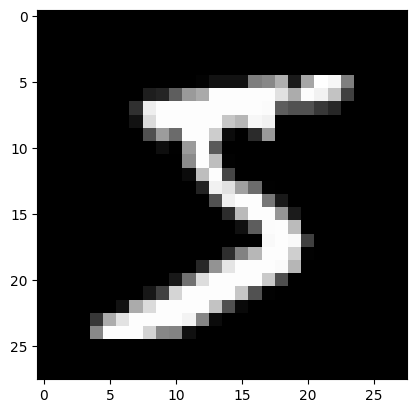

[5 0 4 ... 5 6 8]


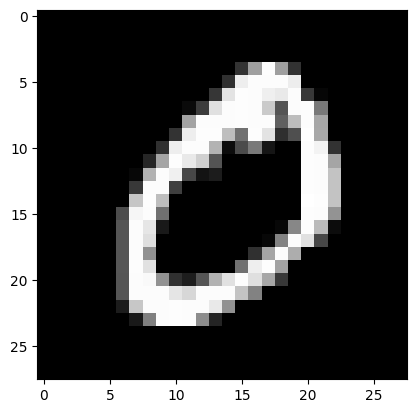

[5 0 4 ... 5 6 8]


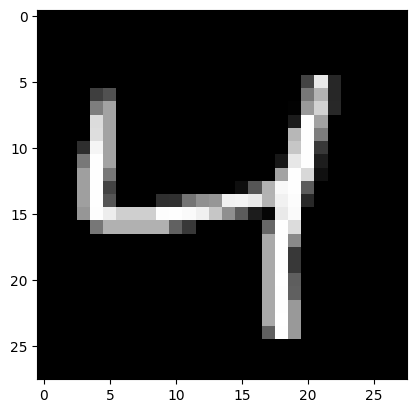

[5 0 4 ... 5 6 8]


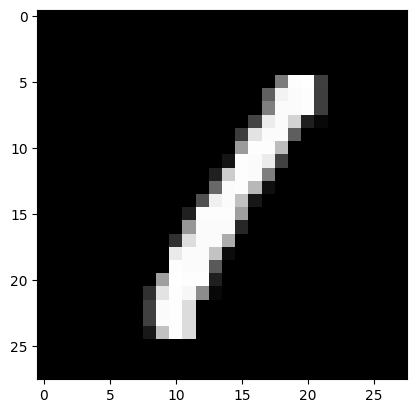

[5 0 4 ... 5 6 8]


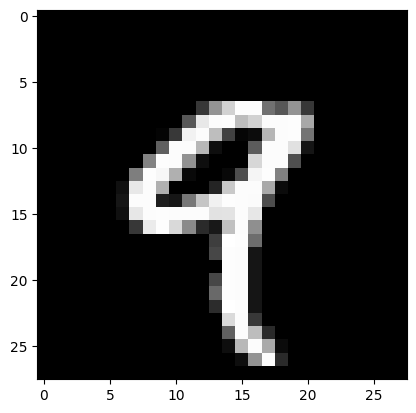

[5 0 4 ... 5 6 8]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 19s 7ms/step - loss: 0.2522 - accuracy: 0.9272 - val_loss: 0.1287 - val_accuracy: 0.9584
Epoch 2/100
1875/1

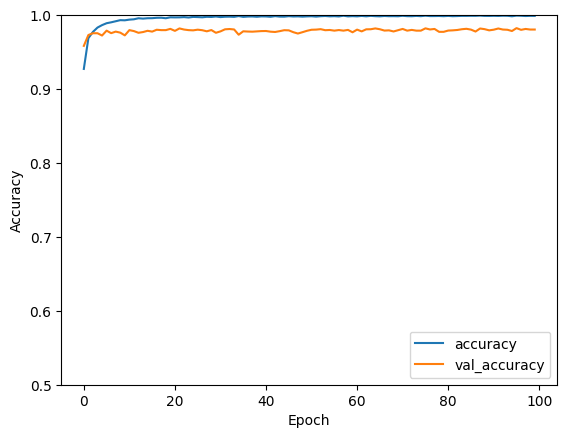

313/313 - 1s - loss: 0.2910 - accuracy: 0.9805 - 595ms/epoch - 2ms/step


[0.2910480797290802, 0.9804999828338623]

In [3]:
# %load tensorflowNN.py
# The MNIST dataset is a benchmark used in almost all languages
# You can load it from either TensorFlow lib or the keras lib
# this one uses softmax + NN + gradient descent /  + cross entropy to recognise MNIST
# CNN is not used here

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers
# from keras.datasets import mnist and convert pixel values to float between 0-1
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def plot_digit(index):
    digit = x_train[index]
    digit = np.array(digit, dtype='float')
    pixels = digit.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print(y_train)
for i in range(5):
    plot_digit(i)

def plot_training(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()
# plot the training accuracy / validation accuracy changes

model = tf.keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# here we use the keras pipeline, you can use other ways to define the model
# or you can try another model with different layers and parameters
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(30, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10, activation='softmax')
# ])
model.summary()
# to review the structure of your network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# adam is the commonly used optimiser today
# no convolution layer is used here, only the fully connected layers are used
# please do check what each layer represents and how they work together as a network

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
# the accuracy is not always increasing if you follow the output during each epoch
# please do browse why this happens
plot_training(history)
model.evaluate(x_test, y_test, verbose=2)
# you are likely to have a training accuracy of 99.8x%-99.9x% and a validation accuracy rate of 98.x% for digits recognition

## tensorflow CNN

data are compressed
pooling reduce size of input (subsampling) - another lossy compression

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (10000, 28, 28, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (10000, 14, 14, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (10000, 14, 14, 64)       51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (10000, 7, 7, 64)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (10000, 3136)             0         
                                                                 
 dense_3 (Dense)             (10000, 1024)            

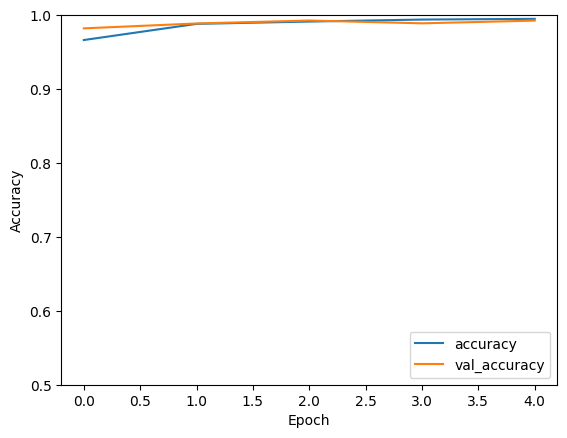

313/313 - 1s - loss: 0.0273 - accuracy: 0.9926 - 741ms/epoch - 2ms/step


[0.027310339733958244, 0.9926000237464905]

In [4]:
# %load tensorflowCNN.py
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers

def plot_training(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.reshape(60000, 28, 28, 1)

model = tf.keras.Sequential([
    layers.Conv2D(32, (5, 5), padding="SAME", activation="relu"),
    # layers.Conv2D(1, (5, 5), padding="SAME", activation="relu"),
# here we define the first convolution layer with 32 kernels/neurons of kernel size 5x5, activation function of relu
    layers.MaxPool2D(2, 2, padding="SAME"),
# we define a max pooling with the size of 2x2, the input the the returned value after convolution
    layers.Conv2D(64, (5, 5), padding="SAME", activation="relu"),
    layers.MaxPool2D(2, 2, padding="SAME"),
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.build((10000, 28, 28, 1))
model.summary()
# to review the structure of your network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
plot_training(history)
model.evaluate(x_test, y_test, verbose=2)
# you are likely to have a similar accuracy in comparison with using NN only

## tensorflow CNNImages

170498071/170498071 [==============================] - 6s 0us/step


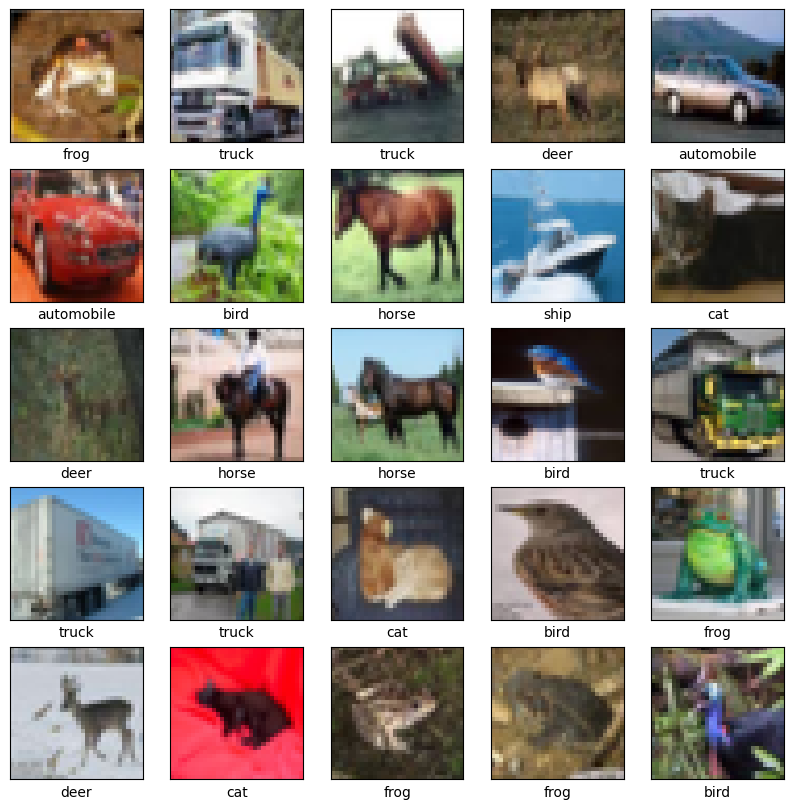

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

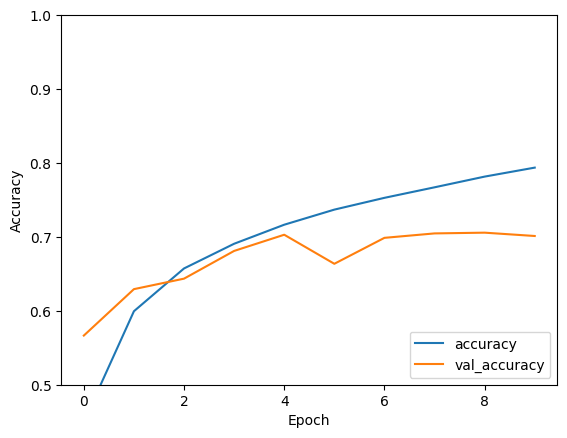

313/313 - 1s - loss: 0.8905 - accuracy: 0.7012 - 660ms/epoch - 2ms/step


[0.8905356526374817, 0.701200008392334]

In [5]:
# %load tensorflowCNNImages.py
import tensorflow as tf
from tensorflow.keras import datasets, layers
import matplotlib.pyplot as plt

def plot_training(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
# pixels to flot between 0-1
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# 10 classes for the cifar
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation="softmax"))
# here we have 3 convolutional layers + 2 fully connected layers
model.summary()
# to review the structure of your network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
plot_training(history)
model.evaluate(test_images, test_labels, verbose=2)

## tensorflow RNN

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                5952      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4986 - accuracy: 0.8480 - val_loss: 0.2583 - val_accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2578 - accuracy: 0.9248 - val_loss: 0.2704 - val_accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2164 - accuracy: 0.9376 - 

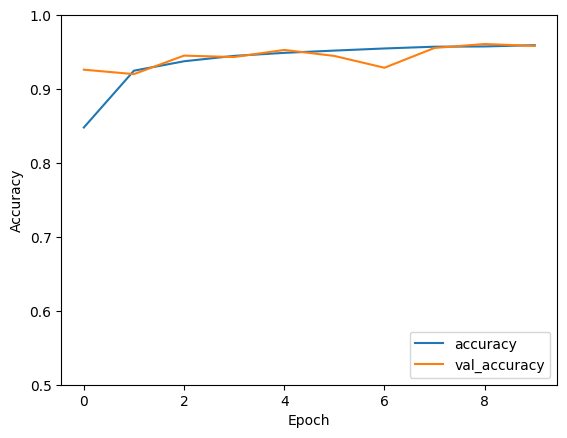

313/313 - 1s - loss: 0.1532 - accuracy: 0.9583 - 1s/epoch - 4ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 81,674
Trainable params: 81,674
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3292 - accuracy: 0.8942 - val_loss: 0.1172 - val_accuracy: 0.9631
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1016 - accuracy: 0.9690 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0692 - ac

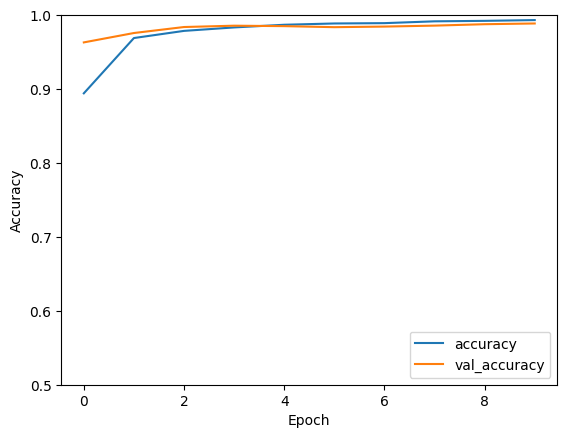

313/313 - 1s - loss: 0.0374 - accuracy: 0.9887 - 878ms/epoch - 3ms/step


[0.037407681345939636, 0.9886999726295471]

In [6]:
# %load tensorflowRNN.py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

def plot_training(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

modelRNN = tf.keras.Sequential()
modelRNN.add(layers.SimpleRNN(64, input_shape=(28, 28)))
# add a RNN layer with 64 internal units / neurons for output
modelRNN.add(layers.Dense(10, activation='softmax'))
modelRNN.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
modelRNN.summary()
historyRNN = modelRNN.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_training(historyRNN)
modelRNN.evaluate(x_test, y_test, verbose=2)

modelLSTM = tf.keras.Sequential()
modelLSTM.add(layers.LSTM(128, input_shape=(28, 28)))
# add a LSTM layer with 128 internal units / neurons for output
modelLSTM.add(layers.Dense(10, activation='softmax'))
modelLSTM.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
modelLSTM.summary()
historyLSTM = modelLSTM.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
plot_training(historyLSTM)
modelLSTM.evaluate(x_test, y_test, verbose=2)